In [204]:
#前処理について
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [212]:
df_train=pd.read_csv("train_taitanic.csv")
df_test=pd.read_csv("test_titanic.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [273]:
#Sexのダミー変数化
sex_dum = pd.get_dummies(df_train['Sex'])
df_train_proc = pd.concat((df_train,sex_dum),axis=1)
df_train_proc = df_train_proc.drop('Sex',axis=1)
#Embarkedのダミー変数化
emb_dum = pd.get_dummies(df_train['Embarked'])
df_train_proc = pd.concat((df_train_proc,emb_dum),axis=1)
df_train_proc = df_train_proc.drop('Embarked',axis=1)
df_train_proc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
female           0
male             0
C                0
Q                0
S                0
dtype: int64

In [207]:
#加工する
df_train_proc_dn = df_train_proc.dropna()
df_train_proc_dn = df_train_proc_dn.drop('PassengerId',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Name',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Ticket',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Cabin',axis=1)

df_train_proc_dn.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,0.535727,-0.535727,0.098712,-0.039232,-0.104544
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,0.041725,-0.041725,-0.228001,-0.038676,0.241617
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,-0.172307,0.172307,0.076824,0.017855,-0.099916
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,0.095344,-0.095344,-0.050628,0.169778,0.029704
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,0.081832,-0.081832,-0.068949,-0.065543,0.096096
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,0.129871,-0.129871,0.239531,0.015604,-0.240180
female,0.535727,0.041725,-0.172307,0.095344,0.081832,0.129871,1.000000,-1.000000,0.053879,0.002826,-0.076760
male,-0.535727,-0.041725,0.172307,-0.095344,-0.081832,-0.129871,-1.000000,1.000000,-0.053879,-0.002826,0.076760
C,0.098712,-0.228001,0.076824,-0.050628,-0.068949,0.239531,0.053879,-0.053879,1.000000,-0.076941,-0.954268
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,0.002826,-0.002826,-0.076941,1.000000,-0.135548


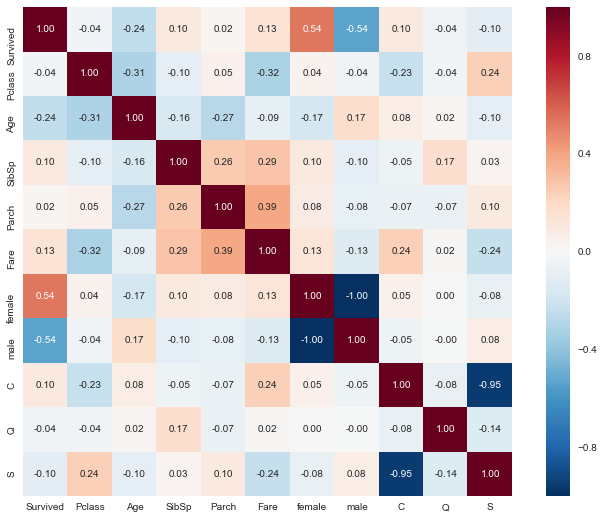

In [208]:
import seaborn as sns
plt.figure(figsize=(12, 9))
sns.heatmap(df_train_proc_dn.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [218]:
#以上の図から女性であることと年齢にはSurviverdするために相関があることが読める。
#ここからAgeとSexの二つを分類のための説明変数としながらもともとのデータの前処理をしていく
#再びSexのダミー変数化
sex_dum = pd.get_dummies(df_train['Sex'])
df_train_proc = pd.concat((df_train,sex_dum),axis=1)
df_train_proc = df_train_proc.drop('Sex',axis=1)
y_train_sur=df_train_proc.loc[:,"Survived"]#Survivesdだけをきりとっていく                  
# Ageにたいして回帰補完を行う
# 線形回帰を選択
df_train_proc = df_train_proc.interpolate(method='linear')
df_train_Af=df_train_proc.loc[:,["Age","female"]]
df_train_Af
#前処理済みのデータが完成

,Age,female
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
5,44.5,0
6,54.0,0
7,2.0,0
8,27.0,1
9,14.0,1


In [225]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train_Af)
X_train_std = scaler.transform(df_train_Af)

In [226]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_std, y_train_sur, test_size=0.3, random_state=0)

In [244]:
# 線形SVCの学習
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [249]:
#過学習していないかどうかの比較
print("train:{}".format(svc.score(X_train,y_train)))
print("test:{}".format(svc.score(X_test,y_test)))

train:0.7865168539325843
test:0.7873134328358209


In [ ]:
#うえの結果から過学習がしていないものと考えられる。
#最終的に予測モデルが完成した。

In [216]:
#テストデータの加工
#ここからAgeとSexの二つを分類のための説明変数としながらもともとのデータの前処理をしていく
#再びSexのダミー変数化
sex_dum = pd.get_dummies(df_test['Sex'])
df_test_proc = pd.concat((df_test,sex_dum),axis=1)
df_test_proc = df_test_proc.drop('Sex',axis=1)                 
# Ageにたいして回帰補完を行う
# 線形回帰を選択
df_test_proc = df_test_proc.interpolate(method='linear')
df_test_Af=df_test_proc.loc[:,["Age","female"]]
df_test_Af
#前処理済みのtestデータが完成

,Age,female
0,34.5,0
1,47.0,1
2,62.0,0
3,27.0,0
4,22.0,1
5,14.0,0
6,30.0,1
7,26.0,0
8,18.0,1
9,21.0,0


In [252]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_test_Af)
X_predict = scaler.transform(df_test_Af)

In [270]:
#生存判定の結果
output=svc.predict(X_predict)
zip_data = zip(df_test.loc[:,"PassengerId"].astype(int), output.astype(int))
predict_data = list(zip_data)
predict_data

[(892, 0),
 (893, 1),
 (894, 0),
 (895, 0),
 (896, 1),
 (897, 0),
 (898, 1),
 (899, 0),
 (900, 1),
 (901, 0),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 1),
 (911, 1),
 (912, 0),
 (913, 0),
 (914, 1),
 (915, 0),
 (916, 1),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 0),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 1),
 (925, 1),
 (926, 0),
 (927, 0),
 (928, 1),
 (929, 1),
 (930, 0),
 (931, 0),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 1),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 0),
 (957, 1),
 (958, 1),
 (959, 0),
 (960, 0),
 (961, 1),
 (962, 1),
 (963, 0),
 (964, 1),
 (965, 0),
 (966, 1),
 (967, 0),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 1),
 (972, 0),
 (973, 0),
 (974, 0),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 1),
 (979, 1),
 (980, 1),
 (981, 0),
 (982, 1),

In [272]:
#kaggle提出用+csv化
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df_test.loc[:,"PassengerId"].astype(int), output.astype(int)):
        writer.writerow([pid, survived])